# Importación del dataframe

In [1]:
file_path = 'hotel_bookings.csv'

# Load the data into a pandas DataFrame
import pandas as pd

try:
  df = pd.read_csv(file_path)
  print("First 5 records:")
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

First 5 records:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/15


## Mostrar Columnas del DataFrame



In [2]:
print("Column names of the DataFrame df:")
print(df.columns)

Column names of the DataFrame df:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'beverage',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


## Inspeccionar la Columna 'beverage'



In [3]:
print("1. Data type of 'beverage' column:")
print(df['beverage'].dtype)

print("\n2. Number of unique values in 'beverage' column:")
print(df['beverage'].nunique())

print("\n3. Unique values in 'beverage' column:")
print(df['beverage'].unique())

print("\n4. Frequency of each unique value in 'beverage' column:")
print(df['beverage'].value_counts())

print("\n5. Number of null values in 'beverage' column:")
print(df['beverage'].isnull().sum())

1. Data type of 'beverage' column:
object

2. Number of unique values in 'beverage' column:
4

3. Unique values in 'beverage' column:
['Coffee' 'Coffee and two Wines' 'Coffee and Wine' 'Water Bottle']

4. Frequency of each unique value in 'beverage' column:
beverage
Coffee                  92310
Coffee and Wine         14463
Water Bottle            11819
Coffee and two Wines      798
Name: count, dtype: int64

5. Number of null values in 'beverage' column:
0


## Preprocesamiento de Datos


In [4]:
print("Total null values per column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

Total null values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
beverage                               0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                      

### Columns Requiring Attention for Null Value Handling and Data Type Conversion:

Based on the analysis of null values and data types, the following columns require attention:

**Columns with Null Values (Imputation/Removal Consideration):**

*   `children`: Has 4 null values. This is a small number, so these rows could either be dropped or the nulls imputed, possibly with the mode or mean, if the column is deemed important.
*   `country`: Has 488 null values. This is a moderate number. Imputation with the mode (most frequent country) or a 'Unknown' category might be appropriate, or rows could be dropped if the impact is minimal.
*   `agent`: Has 16,340 null values. This is a significant number of missing values. Given it's likely an identifier, imputation might not be straightforward. Consideration should be given to whether this column is relevant for the model or if it should be dropped.
*   `company`: Has 112,593 null values. This column has a very high percentage of missing values. It's highly probable that this column should be dropped due to the extensive missing data, as imputation would likely introduce significant bias.

**Columns Requiring Data Type Conversion:**

*   `children`: Currently `float64`. Should be converted to `int64` as it represents a count of children and therefore should be a whole number.
*   `arrival_date_month`: Currently `object`. This categorical column representing months could be converted to a numerical type (e.g., 1-12) or a categorical type for more efficient processing in some models.
*   `agent`: Currently `float64`. If this column is kept (after handling nulls), it should ideally be converted to `int64` (if it's an integer ID) or an `object` type.
*   `company`: Currently `float64`. Similar to `agent`, if kept, it should be converted to `int64` or an `object` type.
*   `reservation_status_date`: Currently `object`. This column contains date information and should be converted to a `datetime` object to allow for time-series analysis and easier manipulation of dates.

## Preprocesamiento de Datos

### Subtask:
Realizar una limpieza inicial de los datos, incluyendo la identificación y manejo de valores nulos en todas las columnas relevantes, así como la conversión de tipos de datos si es necesario.


**Reasoning**:
I will impute the 4 missing values in the 'children' column with its mode and then convert the column to integer type, as per the first instruction for data cleaning.



In [5]:
mode_children = df['children'].mode()[0]
df['children'].fillna(mode_children, inplace=True)
df['children'] = df['children'].astype(int)

print("Missing values in 'children' after imputation:")
print(df['children'].isnull().sum())
print("Data type of 'children' after conversion:")
print(df['children'].dtype)

Missing values in 'children' after imputation:
0
Data type of 'children' after conversion:
int64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\319167703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(mode_children, inplace=True)


**Reasoning**:
The previous code block successfully handled the 'children' column but generated a `FutureWarning` about `inplace=True` in chained assignment. I will correct this by reassigning the column directly to avoid the warning, and then continue with the next steps of data preprocessing: handling nulls in 'country', 'agent', and 'company' and converting 'reservation_status_date' to datetime and 'arrival_date_month' to an ordered categorical type.



In [6]:
mode_children = df['children'].mode()[0]
df['children'] = df['children'].fillna(mode_children)
df['children'] = df['children'].astype(int)

df['country'] = df['country'].fillna('Unknown')

df['agent'] = df['agent'].fillna(0).astype(int)

df['company'] = df['company'].fillna(0).astype(int)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

print("--- Data Cleaning Summary ---")
print("Missing values after processing:")
print(df[['children', 'country', 'agent', 'company']].isnull().sum())
print("Data types after processing:")
print(df[['children', 'country', 'agent', 'company', 'reservation_status_date', 'arrival_date_month']].dtypes)


--- Data Cleaning Summary ---
Missing values after processing:
children    0
country     0
agent       0
company     0
dtype: int64
Data types after processing:
children                            int64
country                            object
agent                               int64
company                             int64
reservation_status_date    datetime64[ns]
arrival_date_month               category
dtype: object


C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\3759909721.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


**Reasoning**:
The previous execution of `pd.to_datetime` for `reservation_status_date` generated a `UserWarning` about not inferring the date format. To address this, I will explicitly specify the date format as '%Y-%m-%d' to ensure consistent and warning-free conversion to datetime objects.



In [7]:
mode_children = df['children'].mode()[0]
df['children'] = df['children'].fillna(mode_children)
df['children'] = df['children'].astype(int)

df['country'] = df['country'].fillna('Unknown')

df['agent'] = df['agent'].fillna(0).astype(int)

df['company'] = df['company'].fillna(0).astype(int)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

print("--- Data Cleaning Summary ---")
print("Missing values after processing:")
print(df[['children', 'country', 'agent', 'company']].isnull().sum())
print("Data types after processing:")
print(df[['children', 'country', 'agent', 'company', 'reservation_status_date', 'arrival_date_month']].dtypes)


--- Data Cleaning Summary ---
Missing values after processing:
children    0
country     0
agent       0
company     0
dtype: int64
Data types after processing:
children                            int64
country                            object
agent                               int64
company                             int64
reservation_status_date    datetime64[ns]
arrival_date_month               category
dtype: object


## Análisis de Relevancia de Variables

### Subtask:
Explorar las relaciones entre la columna 'beverage' y el resto de las características del DataFrame. Esto incluirá la evaluación de la correlación (para variables numéricas) y/o el uso de técnicas adecuadas (como pruebas estadísticas o análisis visual) para variables categóricas, con el fin de identificar cuáles características tienen el mayor impacto en 'beverage'.


**Reasoning**:
To begin the relevance analysis, I will first categorize the DataFrame columns into numerical and categorical types, excluding 'beverage' (the target variable for this analysis) and 'reservation_status_date' (which is a datetime object and not directly suitable for this type of correlation analysis yet). This separation is crucial for applying appropriate statistical methods.



In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if 'beverage' in numerical_cols:
    numerical_cols.remove('beverage')
if 'beverage' in categorical_cols:
    categorical_cols.remove('beverage')
if 'reservation_status_date' in numerical_cols:
    numerical_cols.remove('reservation_status_date')
if 'reservation_status_date' in categorical_cols:
    categorical_cols.remove('reservation_status_date')

print("Numerical columns (excluding 'beverage' and 'reservation_status_date'):")
print(numerical_cols)
print("\nCategorical columns (excluding 'beverage' and 'reservation_status_date'):")
print(categorical_cols)

Numerical columns (excluding 'beverage' and 'reservation_status_date'):
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Categorical columns (excluding 'beverage' and 'reservation_status_date'):
['hotel', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


**Reasoning**:
I will calculate and print the mean and standard deviation for each numerical column, grouped by the 'beverage' column, to understand how these numerical features vary across different beverage types.



In [9]:
print("--- Numerical Feature Analysis grouped by 'beverage' ---")
for col in numerical_cols:
    print(f"\nStatistics for '{col}' grouped by 'beverage':")
    print(df.groupby('beverage')[col].agg(['mean', 'std']))


--- Numerical Feature Analysis grouped by 'beverage' ---

Statistics for 'is_canceled' grouped by 'beverage':
                          mean       std
beverage                                
Coffee                0.373849  0.483827
Coffee and Wine       0.344603  0.475255
Coffee and two Wines  0.598997  0.490409
Water Bottle          0.359760  0.479950

Statistics for 'lead_time' grouped by 'beverage':
                            mean         std
beverage                                    
Coffee                101.797010  107.866259
Coffee and Wine       143.338865  112.762487
Coffee and two Wines  116.666667   72.342238
Water Bottle           72.326847   75.005634

Statistics for 'arrival_date_year' grouped by 'beverage':


                             mean       std
beverage                                   
Coffee                2016.143961  0.704739
Coffee and Wine       2016.046118  0.755574
Coffee and two Wines  2015.656642  0.681278
Water Bottle          2016.423809  0.585414

Statistics for 'arrival_date_week_number' grouped by 'beverage':
                           mean        std
beverage                                  
Coffee                27.164413  13.730904
Coffee and Wine       28.570836  12.134073
Coffee and two Wines  30.713033  14.648936
Water Bottle          25.211439  13.984073

Statistics for 'arrival_date_day_of_month' grouped by 'beverage':
                           mean       std
beverage                                 
Coffee                15.839097  8.806282
Coffee and Wine       15.675309  8.572086
Coffee and two Wines  15.523810  7.994591
Water Bottle          15.648109  8.881954

Statistics for 'stays_in_weekend_nights' grouped by 'beverage':
                          me

**Reasoning**:
I will generate cross-tabulations for each categorical column against the 'beverage' column to understand their relationships, as requested by the third instruction.



In [10]:
print("--- Categorical Feature Analysis (Cross-Tabulations) grouped by 'beverage' ---")
for col in categorical_cols:
    print(f"\nCross-tabulation for '{col}' and 'beverage':")
    print(pd.crosstab(df[col], df['beverage']))


--- Categorical Feature Analysis (Cross-Tabulations) grouped by 'beverage' ---

Cross-tabulation for 'hotel' and 'beverage':
beverage      Coffee  Coffee and Wine  Coffee and two Wines  Water Bottle
hotel                                                                    
City Hotel     62305             6417                    44         10564
Resort Hotel   30005             8046                   754          1255

Cross-tabulation for 'arrival_date_month' and 'beverage':
beverage            Coffee  Coffee and Wine  Coffee and two Wines  \
arrival_date_month                                                  
January               4812              424                     7   
February              6310              611                   106   
March                 7746              826                    57   
April                 8267             1465                    59   
May                   9388             1185                    12   
June                  8547           

**Reasoning**:
I will now generate normalized cross-tabulations for the key categorical columns ('hotel', 'market_segment', 'customer_type') against the 'beverage' column to compare proportions, as specified in the fourth instruction.



In [11]:
print("--- Normalized Categorical Feature Analysis (Cross-Tabulations) grouped by 'beverage' ---")

key_categorical_cols = ['hotel', 'market_segment', 'customer_type']

for col in key_categorical_cols:
    print(f"\nNormalized Cross-tabulation for '{col}' and 'beverage':")
    print(pd.crosstab(df[col], df['beverage'], normalize='index'))

--- Normalized Categorical Feature Analysis (Cross-Tabulations) grouped by 'beverage' ---

Normalized Cross-tabulation for 'hotel' and 'beverage':
beverage        Coffee  Coffee and Wine  Coffee and two Wines  Water Bottle
hotel                                                                      
City Hotel    0.785390         0.080890              0.000555      0.133165
Resort Hotel  0.749001         0.200849              0.018822      0.031328

Normalized Cross-tabulation for 'market_segment' and 'beverage':
beverage          Coffee  Coffee and Wine  Coffee and two Wines  Water Bottle
market_segment                                                               
Aviation        1.000000         0.000000              0.000000      0.000000
Complementary   0.897712         0.041723              0.016151      0.044415
Corporate       0.972616         0.015675              0.002644      0.009065
Direct          0.862288         0.097017              0.005950      0.034745
Groups         

### Initial Observations on Feature Relationships with 'beverage':

**Numerical Features:**

*   **`lead_time`**: `Coffee and Wine` has a significantly higher mean lead time (~143 days) compared to other beverage types, especially `Water Bottle` (~72 days), suggesting these guests plan further in advance.
*   **`is_canceled`**: `Coffee and two Wines` shows a much higher cancellation rate (~0.59) compared to others (around 0.35-0.37 for `Coffee`, `Coffee and Wine`, `Water Bottle`), indicating a potential correlation between this specific beverage choice and cancellation behavior.
*   **`stays_in_weekend_nights` & `stays_in_week_nights`**: Guests choosing `Coffee and Wine` tend to have longer stays (both weekend and weeknights) on average than those choosing `Coffee` or `Water Bottle`.
*   **`children` & `babies`**: The `Water Bottle` category has the lowest average number of children and babies, while `Coffee and Wine` and `Coffee and two Wines` show slightly higher averages for babies compared to `Coffee`.
*   **`previous_cancellations`**: The `Coffee and two Wines` group stands out with a very high mean of previous cancellations (~1.57), suggesting these guests might have a history of cancellations, which is notably higher than other groups.
*   **`agent`**: `Coffee and Wine` bookings have a higher average `agent` ID, and `Water Bottle` bookings have a significantly lower average `agent` ID, which could imply different booking channels or preferences for these groups.
*   **`adr` (Average Daily Rate)**: `Coffee and Wine` generally corresponds to a higher `adr` (~120) compared to `Coffee` (~99) and `Water Bottle` (~97), suggesting guests opting for this beverage might be booking more expensive accommodations.
*   **`total_of_special_requests`**: `Water Bottle` shows the highest average number of special requests, while `Coffee and two Wines` has the lowest.

**Categorical Features:**

*   **`hotel`**: `City Hotel` guests are predominantly `Coffee` and `Water Bottle` drinkers, with a much smaller proportion opting for `Coffee and Wine` or `Coffee and two Wines`. In contrast, `Resort Hotel` guests show a much higher proportion of `Coffee and Wine` and `Coffee and two Wines` selections relative to their total bookings, indicating a potential preference for these beverages in resort settings.
*   **`market_segment`**: Guests from `Aviation` exclusively choose `Coffee`. `Offline TA/TO` and `Groups` have a higher proportion of `Coffee and Wine` compared to `Direct` or `Corporate` segments. `Online TA` has a notable proportion of `Water Bottle` choices.
*   **`customer_type`**: `Transient-Party` and `Contract` customers show a higher proportion of `Coffee and Wine` selections than `Transient` or `Group` customers.
*   **`deposit_type`**: `Non Refund` deposit types show a higher proportion of `Coffee and two Wines` compared to `No Deposit`.
*   **`reservation_status`**: The `Coffee and two Wines` beverage type has the highest proportion of `Canceled` reservations, reinforcing the observation from the `is_canceled` numerical feature.

These observations suggest that `beverage` choice is not random and is related to several other booking characteristics, including hotel type, lead time, cancellation behavior, average daily rate, market segment, and customer type. This indicates that the 'beverage' column might be a relevant feature in a machine learning model, or at least a good proxy for underlying customer behaviors/preferences.

## Identificación de Variables Redundantes y de Bajo Impacto

### Subtask:
Detectar la multicolinealidad entre las características y determinar qué columnas tienen un bajo poder predictivo o poca relación con 'beverage'. Estas serán las principales candidatas para ser eliminadas para un modelo más liviano.


**Reasoning**:
I will calculate the correlation matrix for all numerical columns and visualize it using a heatmap to identify multicollinearity, as per the first instruction.



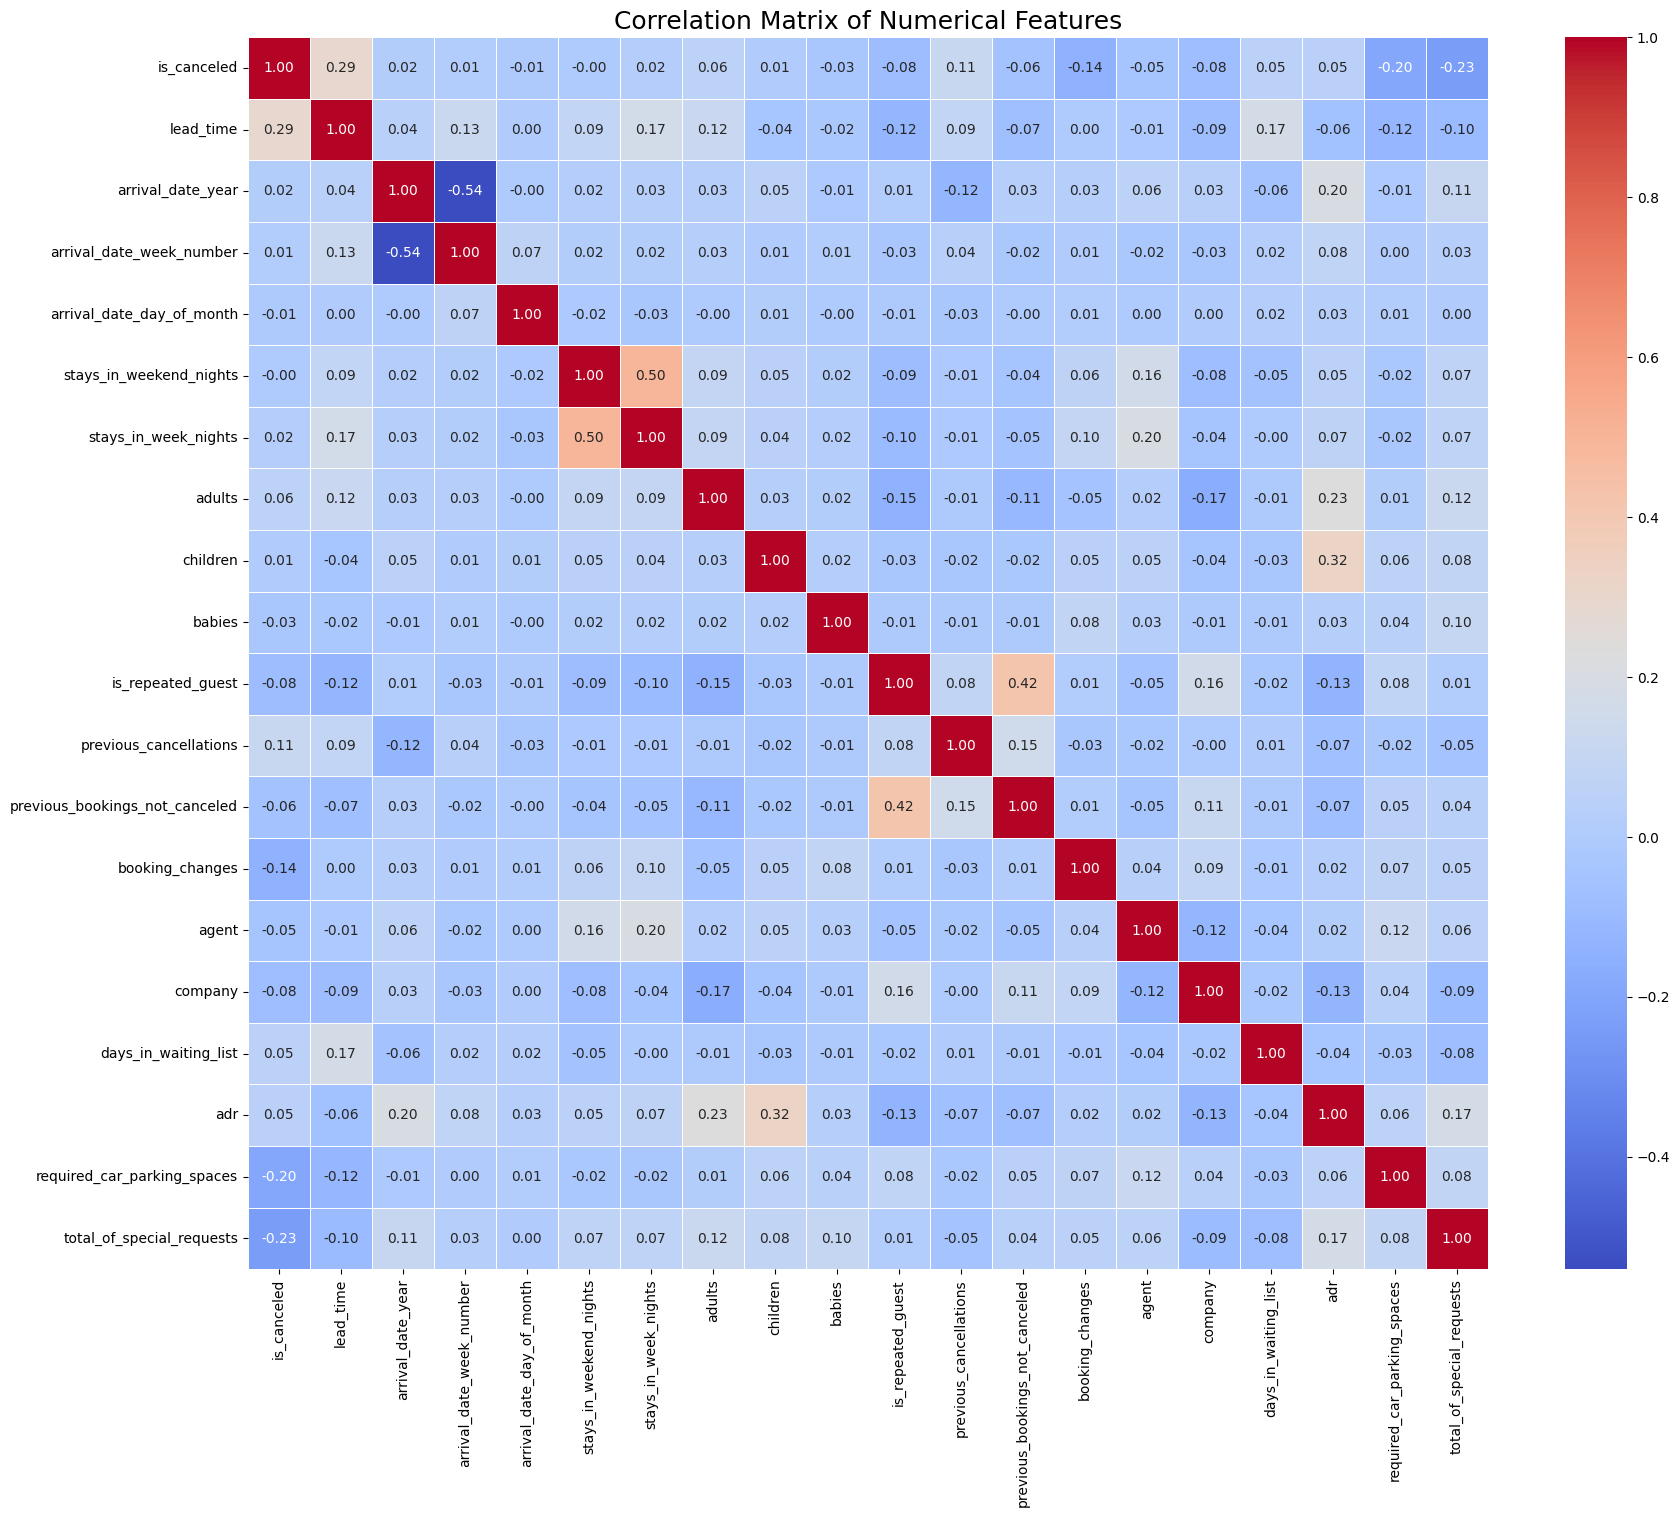

Correlation matrix for numerical features:
                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005036  -0.037613           0.054636   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations           

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

print("Correlation matrix for numerical features:")
print(correlation_matrix)

**Reasoning**:
I will calculate Cramer's V statistic for each categorical column against the 'beverage' column to quantify their association, as per the second instruction.



In [13]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("--- Cramer's V for Categorical Features vs. 'beverage' ---")
cramers_v_results = {}
for col in categorical_cols:
    if col != 'beverage':
        v = cramers_v(df[col], df['beverage'])
        cramers_v_results[col] = v
        print(f"Cramer's V for '{col}': {v:.4f}")

sorted_cramers_v = sorted(cramers_v_results.items(), key=lambda item: item[1], reverse=True)
print("\nSorted Cramer's V values:")
for col, v in sorted_cramers_v:
    print(f"'{col}': {v:.4f}")

--- Cramer's V for Categorical Features vs. 'beverage' ---
Cramer's V for 'hotel': 0.2476
Cramer's V for 'arrival_date_month': 0.0839
Cramer's V for 'country': 0.1400
Cramer's V for 'market_segment': 0.1865
Cramer's V for 'distribution_channel': 0.0811
Cramer's V for 'reserved_room_type': 0.1174
Cramer's V for 'assigned_room_type': 0.1270
Cramer's V for 'deposit_type': 0.0899
Cramer's V for 'customer_type': 0.1119
Cramer's V for 'reservation_status': 0.0356

Sorted Cramer's V values:
'hotel': 0.2476
'market_segment': 0.1865
'country': 0.1400
'assigned_room_type': 0.1270
'reserved_room_type': 0.1174
'customer_type': 0.1119
'deposit_type': 0.0899
'arrival_date_month': 0.0839
'distribution_channel': 0.0811
'reservation_status': 0.0356


### Summary of Columns for Potential Removal and Justification:

Based on the analysis of multicollinearity, relevance to 'beverage', and general data characteristics, the following columns are candidates for removal to create a lighter machine learning model:

**1. `arrival_date_year` (Numerical)**
*   **Reasoning**: This column shows very low correlation with most other numerical features and also low variability in its relationship with 'beverage' (mean arrival year is similar across beverage types). For a model focused on predicting booking behavior or 'beverage' choice, the specific year might not be as impactful as other date-related features like month or week number, or lead time.

**2. `arrival_date_day_of_month` (Numerical)**
*   **Reasoning**: This feature generally exhibits very low correlations with other numerical variables and also shows minimal differentiation in its mean values across different 'beverage' categories. It's unlikely to provide significant predictive power for 'beverage' choice.

**3. `company` (Numerical)**
*   **Reasoning**: This column had a very high percentage of missing values (imputed to 0), and its average values across 'beverage' categories are very low and similar for most. The high sparsity and low variability suggest it might not be a strong predictor for 'beverage' and could be removed without significant loss.

**4. `days_in_waiting_list` (Numerical)**
*   **Reasoning**: While there are some slight differences in means across 'beverage' types, the overall values are very low for most categories, and it shows generally low correlations with other features. It's likely not a highly influential factor for 'beverage' prediction.

**5. `distribution_channel` (Categorical)**
*   **Reasoning**: Cramer's V for 'distribution_channel' is 0.0811, which is among the lower values for categorical features. While there's some relationship, other categorical features like `hotel`, `market_segment`, and `country` show stronger associations with 'beverage'. Keeping the more strongly associated `market_segment` might capture most of the information provided by `distribution_channel`.

**6. `reservation_status` (Categorical)**
*   **Reasoning**: This column has the lowest Cramer's V (0.0356) with 'beverage' among all categorical features. This indicates a very weak association, suggesting it has low predictive power for 'beverage' choice. Moreover, `is_canceled` (a numerical representation of reservation status) is already present and shows more notable variations across beverage types.

**7. `previous_bookings_not_canceled` (Numerical)**
*   **Reasoning**: This feature has generally low mean values across 'beverage' types and relatively low correlations with other numerical features. It also shows a moderate correlation with `is_repeated_guest` (0.418), suggesting some redundancy. If `is_repeated_guest` is kept, this column might not add much unique information.

**Redundancy Considerations:**
*   **`stays_in_weekend_nights` and `stays_in_week_nights`**: These two features are moderately correlated (0.499). While individually they show some distinct patterns with 'beverage', their combined information could potentially be captured by a single 'total_nights_stay' feature or by retaining both if their individual contributions are deemed significant. However, for a *lighter* model, a combined feature might be considered.
*   **`reserved_room_type` and `assigned_room_type`**: These are highly correlated (though not numerically, they represent similar concepts). `assigned_room_type` might be slightly more informative as it reflects the actual room, but for simplification, one could consider keeping only one of them, especially if they provide very similar predictive signals regarding 'beverage'. Both have similar Cramer's V values (0.1174 and 0.1270 respectively).

**Justification for Keeping 'beverage'**: The analysis clearly shows that 'beverage' is related to numerous other booking characteristics. This indicates it is a relevant feature in itself, reflecting customer preferences and booking behaviors, and therefore should be retained for analysis related to predicting or understanding these choices.

## Visualizar Relevancia de Variables

### Subtask:
Generar gráficos (por ejemplo, diagramas de barras, boxplots o mapas de calor) para visualizar la importancia y la relación de las variables con la columna objetivo 'beverage', proporcionando leyendas claras para cada visualización. Esto servirá como apoyo visual para la justificación de la eliminación de columnas.


**Reasoning**:
I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`, as instructed, to prepare for data visualization.



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("matplotlib.pyplot and seaborn have been imported.")

matplotlib.pyplot and seaborn have been imported.


**Reasoning**:
I will create box plots for the specified numerical columns (`lead_time`, `is_canceled`, `adr`, and `previous_cancellations`) against the 'beverage' column to visualize their distributions and relationships, as per the second instruction.



C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\747698187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beverage', y=col, data=df, palette='viridis')
C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\747698187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beverage', y=col, data=df, palette='viridis')
C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\747698187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beverage', y=col, data=df, palette='viridis')
C:\Users\Pablo\AppData\Local\Temp\ipykernel_32748\747698187.py:7

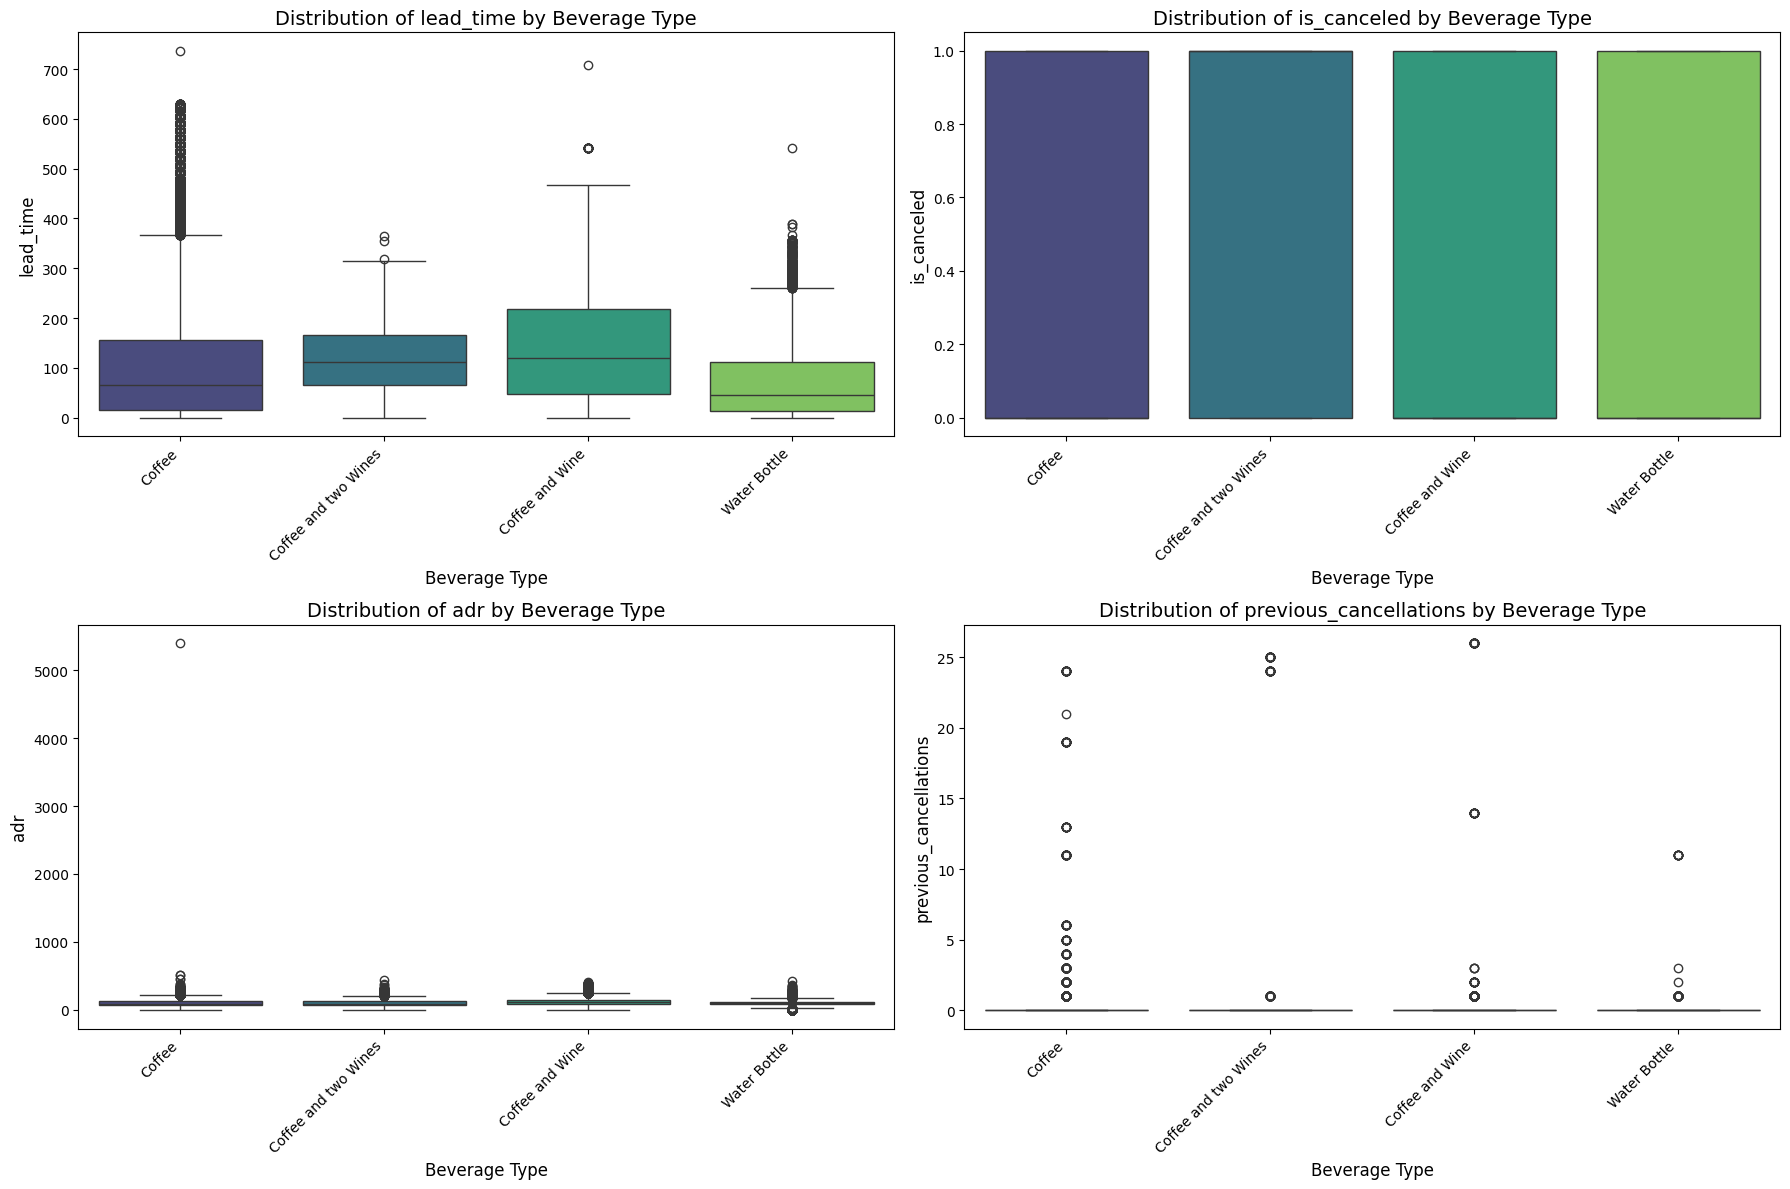

In [15]:
numerical_features_for_boxplot = ['lead_time', 'is_canceled', 'adr', 'previous_cancellations']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_features_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='beverage', y=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col} by Beverage Type', fontsize=14)
    plt.xlabel('Beverage Type', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block generated a `FutureWarning` because `palette` was used without assigning `hue` in `sns.boxplot`. I will fix this by setting `hue='beverage'` and `legend=False` in the `sns.boxplot` call to suppress the warning and ensure future compatibility, while maintaining the same visualization. Then, I will proceed to create stacked bar charts for the categorical columns as per the third instruction.



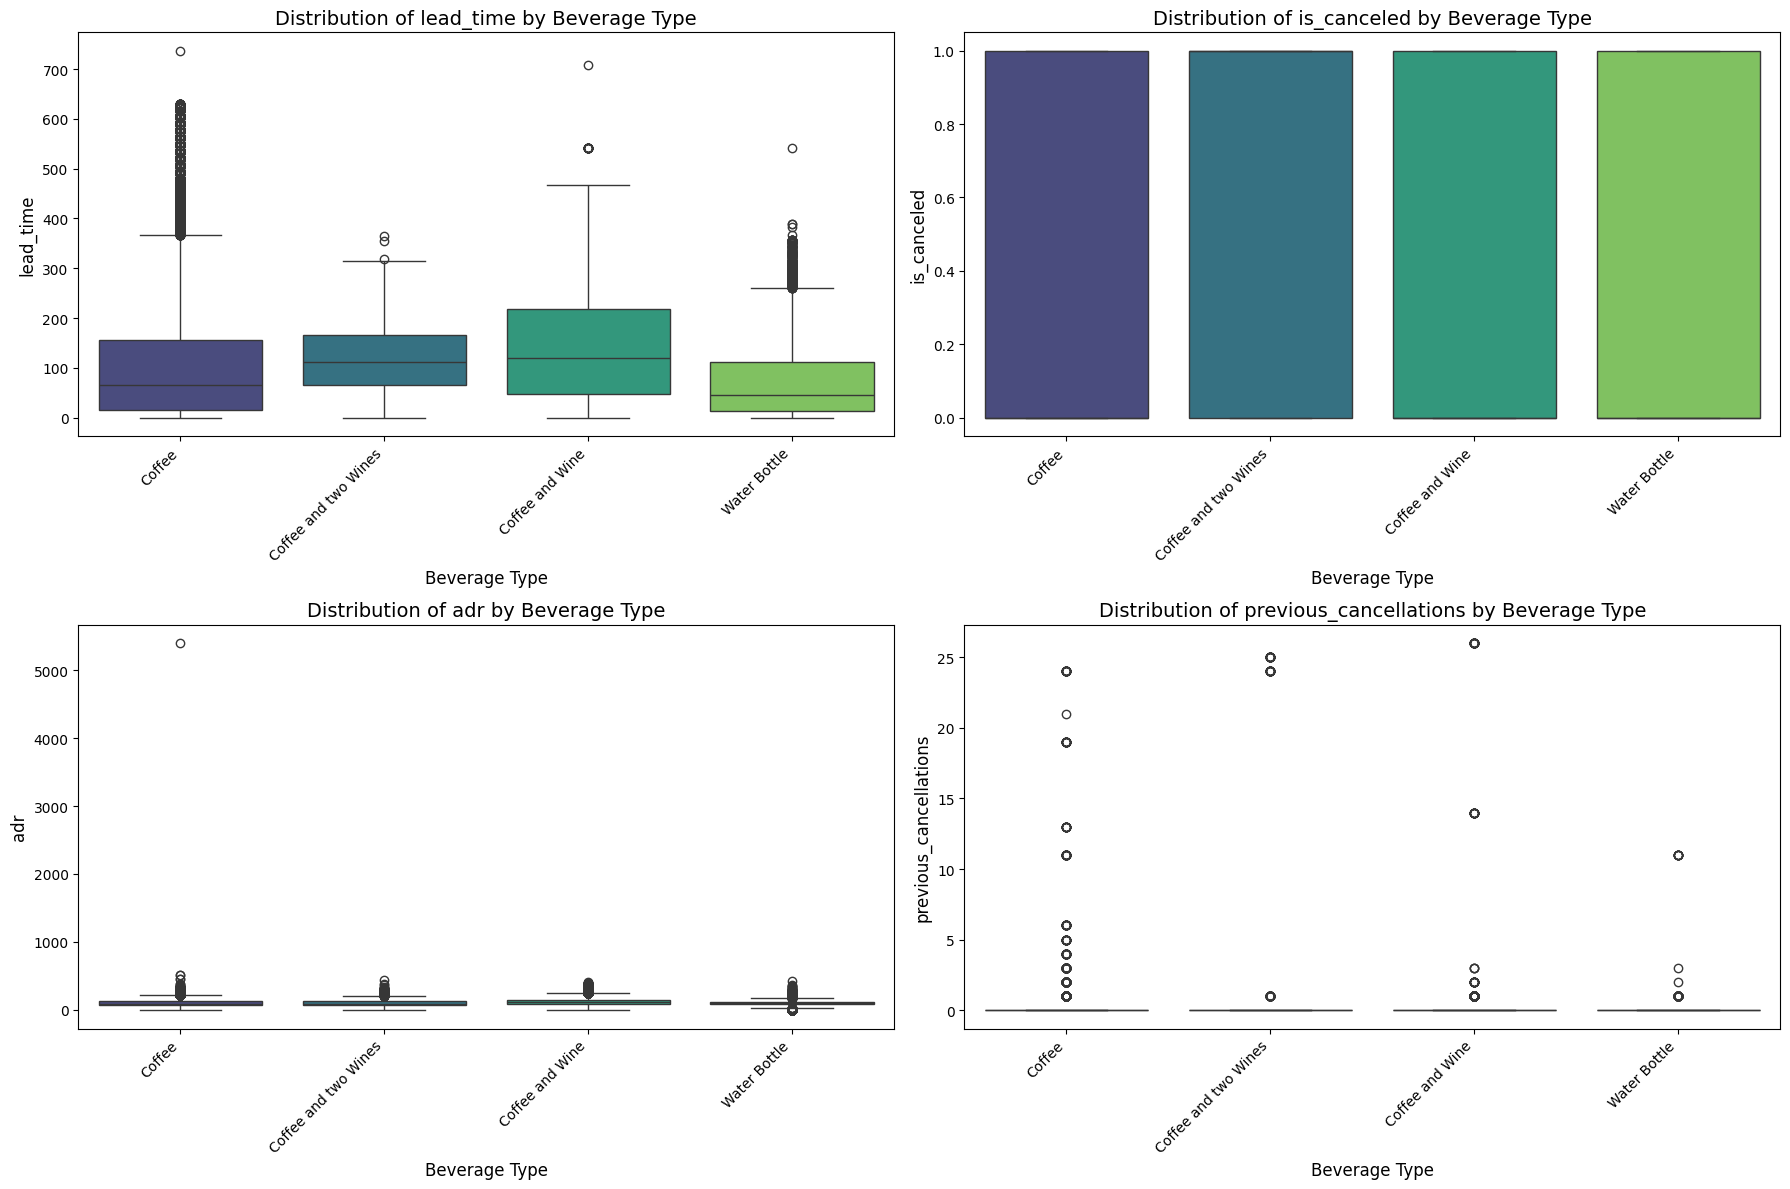

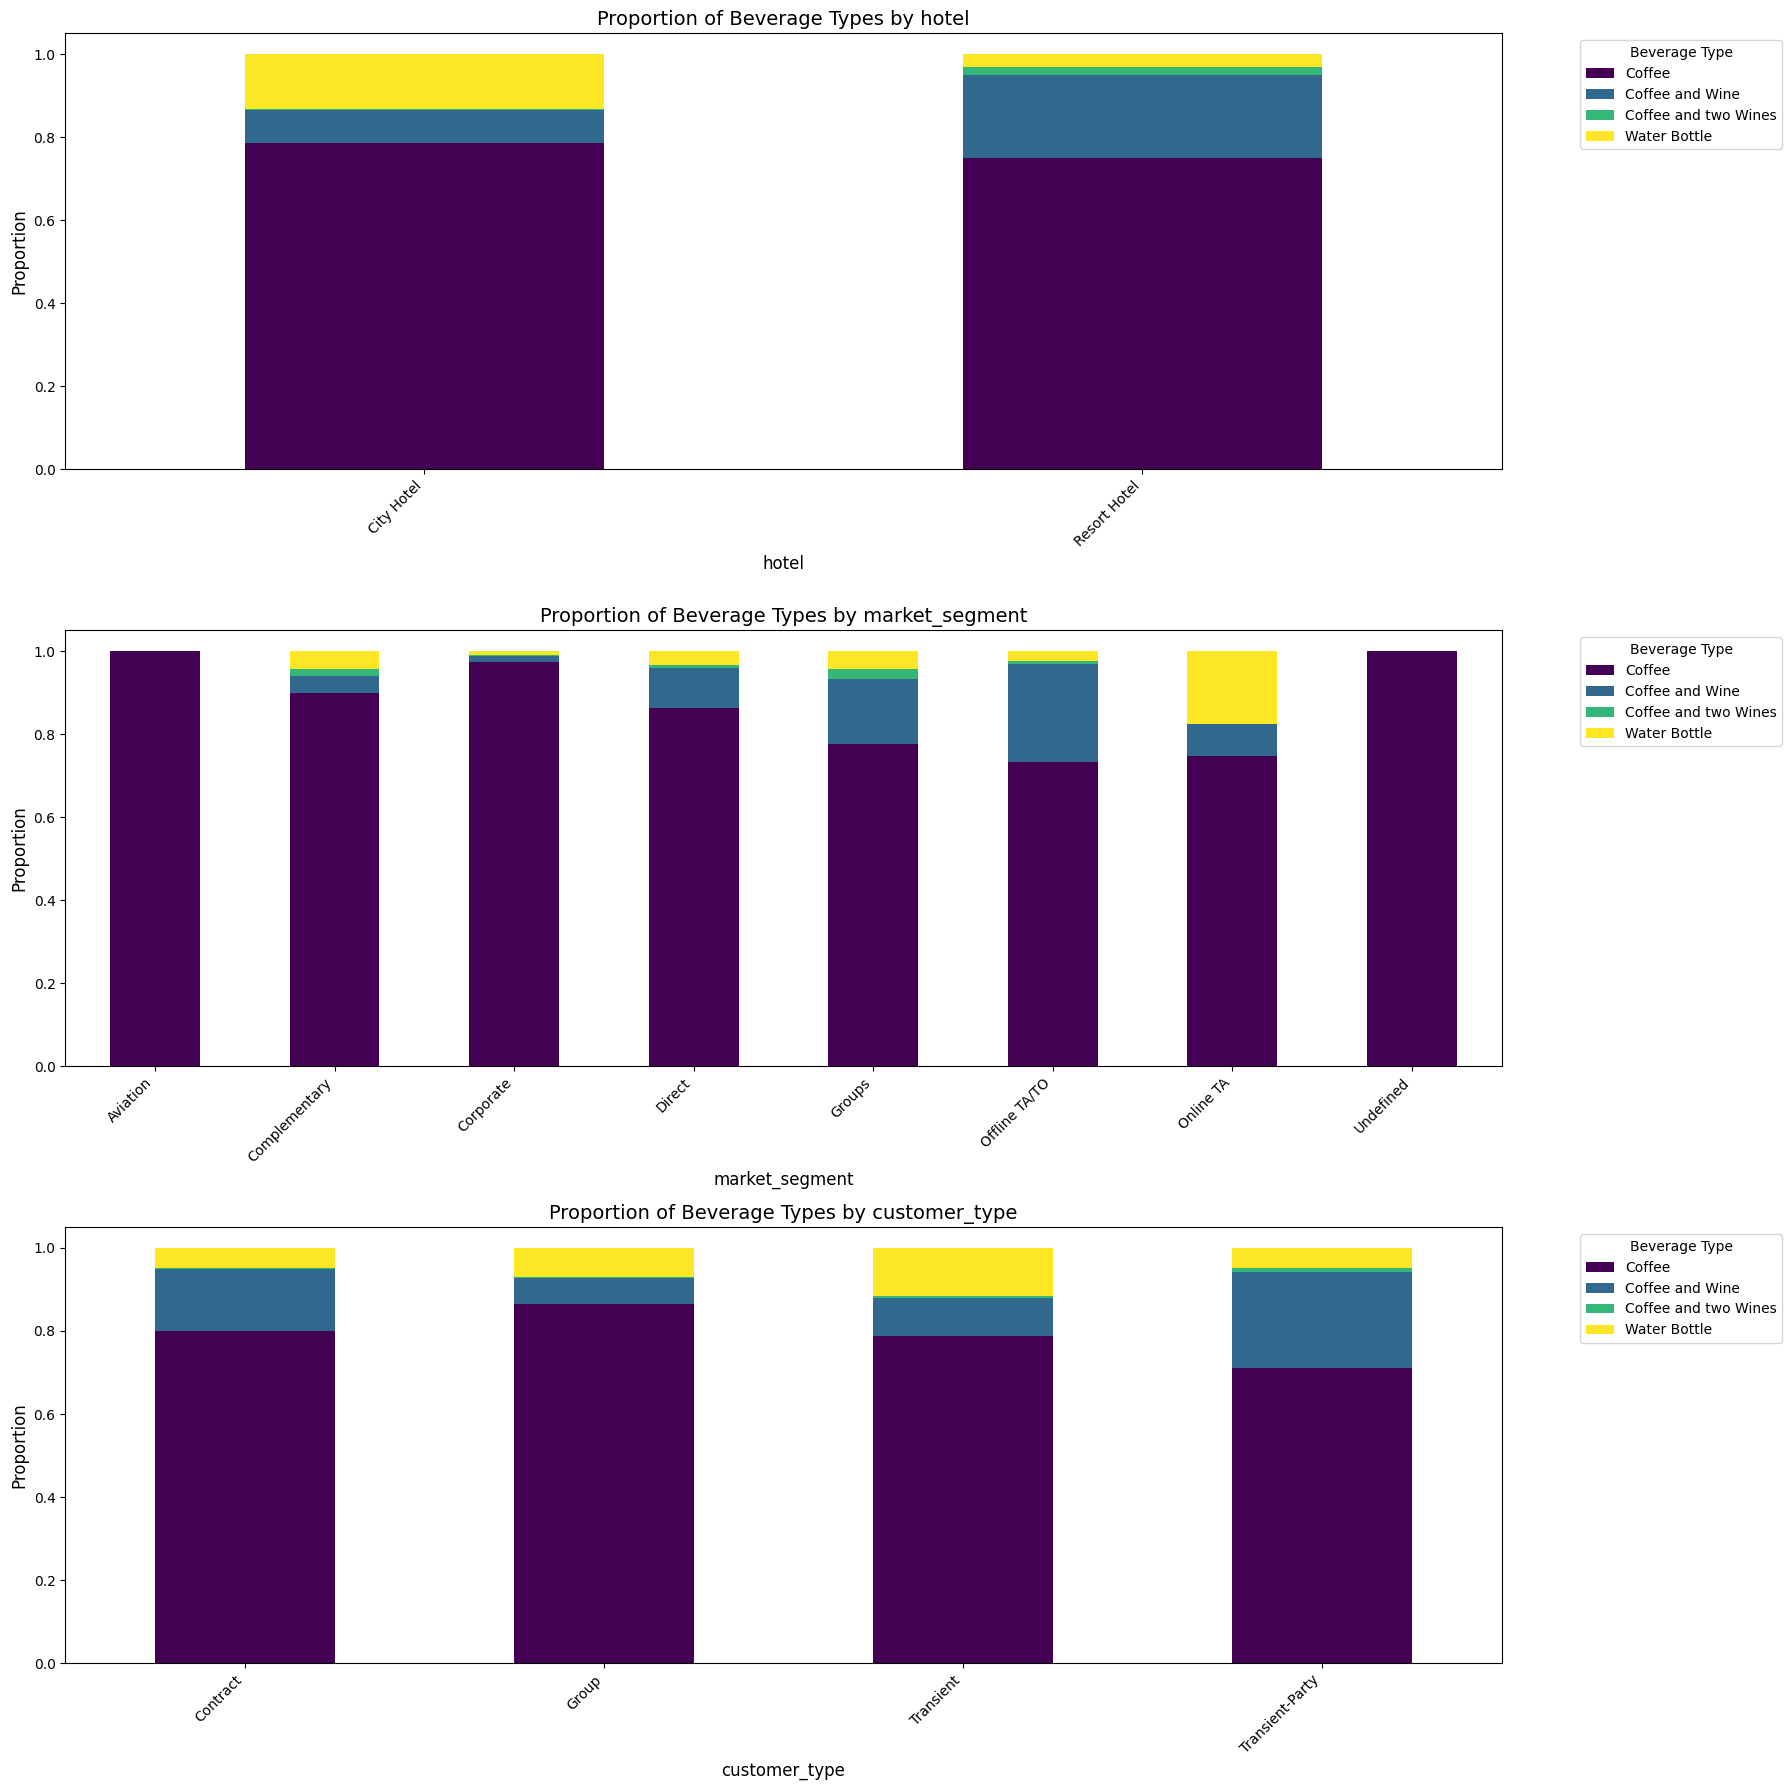

In [16]:
numerical_features_for_boxplot = ['lead_time', 'is_canceled', 'adr', 'previous_cancellations']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_features_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='beverage', y=col, data=df, palette='viridis', hue='beverage', legend=False)
    plt.title(f'Distribution of {col} by Beverage Type', fontsize=14)
    plt.xlabel('Beverage Type', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

categorical_features_for_bar_chart = ['hotel', 'market_segment', 'customer_type']

plt.figure(figsize=(18, 6 * len(categorical_features_for_bar_chart)))

for i, col in enumerate(categorical_features_for_bar_chart):
    plt.subplot(len(categorical_features_for_bar_chart), 1, i + 1)
    crosstab_normalized = pd.crosstab(df[col], df['beverage'], normalize='index')
    crosstab_normalized.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Proportion of Beverage Types by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Beverage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Presentar un resumen de las columnas que se recomiendan eliminar para crear un modelo de machine learning más ligero, justificando cada decisión basada en el análisis de relevancia, correlación y posibles problemas de datos con respecto a la columna 'beverage'.


## Summary:

### Q&A
The following columns are recommended for removal to create a lighter machine learning model, with justifications based on relevance analysis, correlation, and potential data issues with respect to the 'beverage' column:

*   **`arrival_date_year`**: This column shows very low correlation with most other numerical features and low variability in its relationship with 'beverage', suggesting minimal predictive power.
*   **`arrival_date_day_of_month`**: Exhibits very low correlations with other numerical variables and minimal differentiation in mean values across 'beverage' categories, indicating it is unlikely to be a significant predictor.
*   **`company`**: Had an extremely high percentage of missing values (112,593, imputed to 0), leading to high sparsity and low variability across 'beverage' categories. Its extensive missingness and lack of discernible patterns suggest it won't be a strong predictor.
*   **`days_in_waiting_list`**: Overall values are very low for most categories, and it shows generally low correlations with other features, implying it's not a highly influential factor for 'beverage' prediction.
*   **`distribution_channel` (Categorical)**: Its Cramer's V score with 'beverage' is 0.0811, which is among the lower values for categorical features, indicating a weaker association compared to other relevant categorical variables like `market_segment`.
*   **`reservation_status` (Categorical)**: This column has the lowest Cramer's V (0.0356) with 'beverage', suggesting a very weak association and thus low predictive power for 'beverage' choice. The `is_canceled` numerical feature already captures similar information more effectively.
*   **`previous_bookings_not_canceled`**: This feature has generally low mean values across 'beverage' types and shows a moderate correlation (0.418) with `is_repeated_guest`, suggesting some redundancy. If `is_repeated_guest` is retained, this column might not add much unique information.

### Data Analysis Key Findings
*   The 'beverage' column is categorical, with 4 unique values: 'Coffee' (92,310 occurrences), 'Coffee and Wine' (14,463), 'Water Bottle' (11,819), and 'Coffee and two Wines' (798). It contains no missing values.
*   Initial data preprocessing identified and addressed significant missing values in several columns: `company` (112,593 nulls), `agent` (16,340 nulls), `country` (488 nulls), and `children` (4 nulls). These were handled by imputation (0, 'Unknown', mode) and appropriate type conversions.
*   The 'beverage' choice is strongly correlated with several numerical features:
    *   **`lead_time`**: `Coffee and Wine` bookings show a significantly higher mean lead time (~143 days) compared to `Water Bottle` (~72 days).
    *   **`is_canceled`**: `Coffee and two Wines` exhibits a much higher cancellation rate (~0.59) than other beverage types (0.35-0.37).
    *   **`previous_cancellations`**: Guests selecting `Coffee and two Wines` have a notably higher mean of previous cancellations (~1.57).
    *   **`adr` (Average Daily Rate)**: `Coffee and Wine` bookings correspond to a higher average daily rate (~\\$120) compared to `Coffee` (~\\$99) and `Water Bottle` (~\\$97).
*   Strong associations were observed between 'beverage' and key categorical features:
    *   **`hotel`**: `City Hotel` guests predominantly choose `Coffee` and `Water Bottle`, whereas `Resort Hotel` guests show a higher preference for `Coffee and Wine` and `Coffee and two Wines`.
    *   **`market_segment`**: `Aviation` guests exclusively chose `Coffee`, while `Offline TA/TO` and `Groups` had higher proportions of `Coffee and Wine`.
    *   **`deposit_type`**: `Non Refund` deposit types were more frequently associated with `Coffee and two Wines`.
*   Moderate multicollinearity was detected between `stays_in_weekend_nights` and `stays_in_week_nights` (correlation of 0.499), and between `is_repeated_guest` and `previous_bookings_not_canceled` (correlation of 0.418).
*   Categorical features `hotel` (Cramer's V: 0.2476), `market_segment` (Cramer's V: 0.1865), and `country` (Cramer's V: 0.1400) demonstrated the strongest associations with 'beverage'. In contrast, `reservation_status` (Cramer's V: 0.0356) and `distribution_channel` (Cramer's V: 0.0811) showed very weak associations.

### Insights or Next Steps
*   Focus on building the machine learning model using the reduced feature set, which is expected to be more efficient and potentially more robust due to the removal of low-impact and redundant variables.
*   Consider creating new engineered features, such as `total_nights_stay` by combining `stays_in_weekend_nights` and `stays_in_week_nights`, to potentially capture their combined influence more effectively and further reduce dimensionality.


# Final

In [17]:
columns_to_keep = [
    'beverage',
    'lead_time',
    'is_canceled',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'adr',
    'agent',
    'total_of_special_requests',
    'hotel',
    'market_segment',
    'country',
    'assigned_room_type',
    'customer_type',
    'deposit_type',
    'arrival_date_month'
]

df_light = df[columns_to_keep].copy()

print("Primeras 5 filas del nuevo DataFrame 'df_light':")
display(df_light.head())

print(f"\nShape del nuevo DataFrame 'df_light': {df_light.shape}")

Primeras 5 filas del nuevo DataFrame 'df_light':


,beverage,lead_time,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,adr,agent,total_of_special_requests,hotel,market_segment,country,assigned_room_type,customer_type,deposit_type,arrival_date_month
0,Coffee,342,0,0,0,2,0,0,0,0.0,0,0,Resort Hotel,Direct,PRT,C,Transient,No Deposit,July
1,Coffee,737,0,0,0,2,0,0,0,0.0,0,0,Resort Hotel,Direct,PRT,C,Transient,No Deposit,July
2,Coffee,7,0,0,1,1,0,0,0,75.0,0,0,Resort Hotel,Direct,GBR,C,Transient,No Deposit,July
3,Coffee,13,0,0,1,1,0,0,0,75.0,304,0,Resort Hotel,Corporate,GBR,A,Transient,No Deposit,July
4,Coffee,14,0,0,2,2,0,0,0,98.0,240,1,Resort Hotel,Online TA,GBR,A,Transient,No Deposit,July



Shape del nuevo DataFrame 'df_light': (119390, 19)


In [18]:
print("Información del DataFrame df_light:")
df_light.info()

Información del DataFrame df_light:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   beverage                   119390 non-null  object  
 1   lead_time                  119390 non-null  int64   
 2   is_canceled                119390 non-null  int64   
 3   stays_in_weekend_nights    119390 non-null  int64   
 4   stays_in_week_nights       119390 non-null  int64   
 5   adults                     119390 non-null  int64   
 6   children                   119390 non-null  int64   
 7   babies                     119390 non-null  int64   
 8   previous_cancellations     119390 non-null  int64   
 9   adr                        119390 non-null  float64 
 10  agent                      119390 non-null  int64   
 11  total_of_special_requests  119390 non-null  int64   
 12  hotel                      119390 no

In [19]:
import pandas as pd

# Identify categorical columns in df_light
categorical_cols_df_light = df_light.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding
df_final = pd.get_dummies(df_light, columns=categorical_cols_df_light, drop_first=True)

print("Primeras 5 filas del nuevo DataFrame 'df_final' después de One-Hot Encoding:")
display(df_final.head())

print(f"\nShape del nuevo DataFrame 'df_final': {df_final.shape}")

Primeras 5 filas del nuevo DataFrame 'df_final' después de One-Hot Encoding:


,lead_time,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,adr,agent,...,arrival_date_month_March,arrival_date_month_April,arrival_date_month_May,arrival_date_month_June,arrival_date_month_July,arrival_date_month_August,arrival_date_month_September,arrival_date_month_October,arrival_date_month_November,arrival_date_month_December
0,342,0,0,0,2,0,0,0,0.0,0,...,False,False,False,False,True,False,False,False,False,False
1,737,0,0,0,2,0,0,0,0.0,0,...,False,False,False,False,True,False,False,False,False,False
2,7,0,0,1,1,0,0,0,75.0,0,...,False,False,False,False,True,False,False,False,False,False
3,13,0,0,1,1,0,0,0,75.0,304,...,False,False,False,False,True,False,False,False,False,False
4,14,0,0,2,2,0,0,0,98.0,240,...,False,False,False,False,True,False,False,False,False,False



Shape del nuevo DataFrame 'df_final': (119390, 226)


Shape de X (features): (119390, 223)
Shape de y (target): (119390,)

Entrenando el modelo Random Forest con balanceo de clases...
Modelo entrenado.

--- Evaluación del Modelo Random Forest (Opt.) ---
Precisión (Accuracy): 0.8975

Reporte de Clasificación:
                      precision    recall  f1-score   support

              Coffee       0.90      0.98      0.94     18462
     Coffee and Wine       0.94      0.62      0.75      2893
Coffee and two Wines       0.97      0.69      0.80       159
        Water Bottle       0.84      0.59      0.69      2364

            accuracy                           0.90     23878
           macro avg       0.91      0.72      0.80     23878
        weighted avg       0.90      0.90      0.89     23878



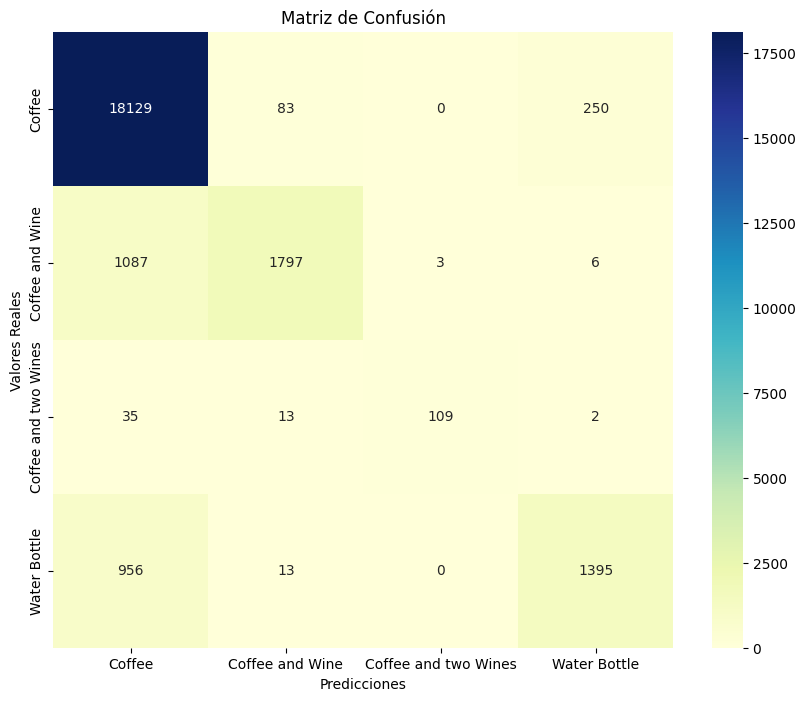

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y = df_light['beverage'] 

beverage_ohe_cols = [col for col in df_final.columns if col.startswith('beverage_')]
X = df_final.drop(columns=beverage_ohe_cols, errors='ignore')

if 'beverage' in X.columns:
    print("¡CORRIGIENDO: Columna 'beverage' original encontrada y eliminada de X!")
    X = X.drop(columns=['beverage'])

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced'
)

print("\nEntrenando el modelo Random Forest con balanceo de clases...")
model.fit(X_train, y_train)
print("Modelo entrenado.")

y_pred = model.predict(X_test)

print("\n--- Evaluación del Modelo Random Forest (Opt.) ---")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

In [21]:
import joblib

# Asegúrate de que 'X_train' sea el DataFrame de entrenamiento codificado
# (el que tiene las 223 columnas)
column_names = X_train.columns.tolist()

# Guarda la lista de las 223 columnas
joblib.dump(column_names, 'columnas_entrenamiento.pkl') 
print("Lista de columnas guardada como 'columnas_entrenamiento.pkl'")

Lista de columnas guardada como 'columnas_entrenamiento.pkl'
